In [213]:
import pandas as pd
import numpy as np

In [214]:
housing =  pd.read_csv('data.csv')

In [215]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [216]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         501 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [217]:
housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [218]:
# Scikit-Learn provides a handy class to take care of missing values: Imputer.
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

housing_num = housing

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [219]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [220]:
# The imputer has simply computed the median of each attribute and stored the result
# in its statistics_ instance variable

imputer.statistics_

array([2.56510e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.20800e+00, 7.75000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.90500e+01, 3.91440e+02, 1.13600e+01, 2.12000e+01])

In [221]:
housing_num.median().values

array([2.56510e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.20800e+00, 7.75000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.90500e+01, 3.91440e+02, 1.13600e+01, 2.12000e+01])

In [222]:
# Now you can use this “trained” imputer to transform the training set by replacing
# missing values by the learned medians:
X = imputer.transform(housing_num)

In [223]:
# If you want to put it back into a Pandas DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [224]:
housing_tr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [225]:
housing_tr.isnull().sum()  # Now there is no null value in dataset.

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

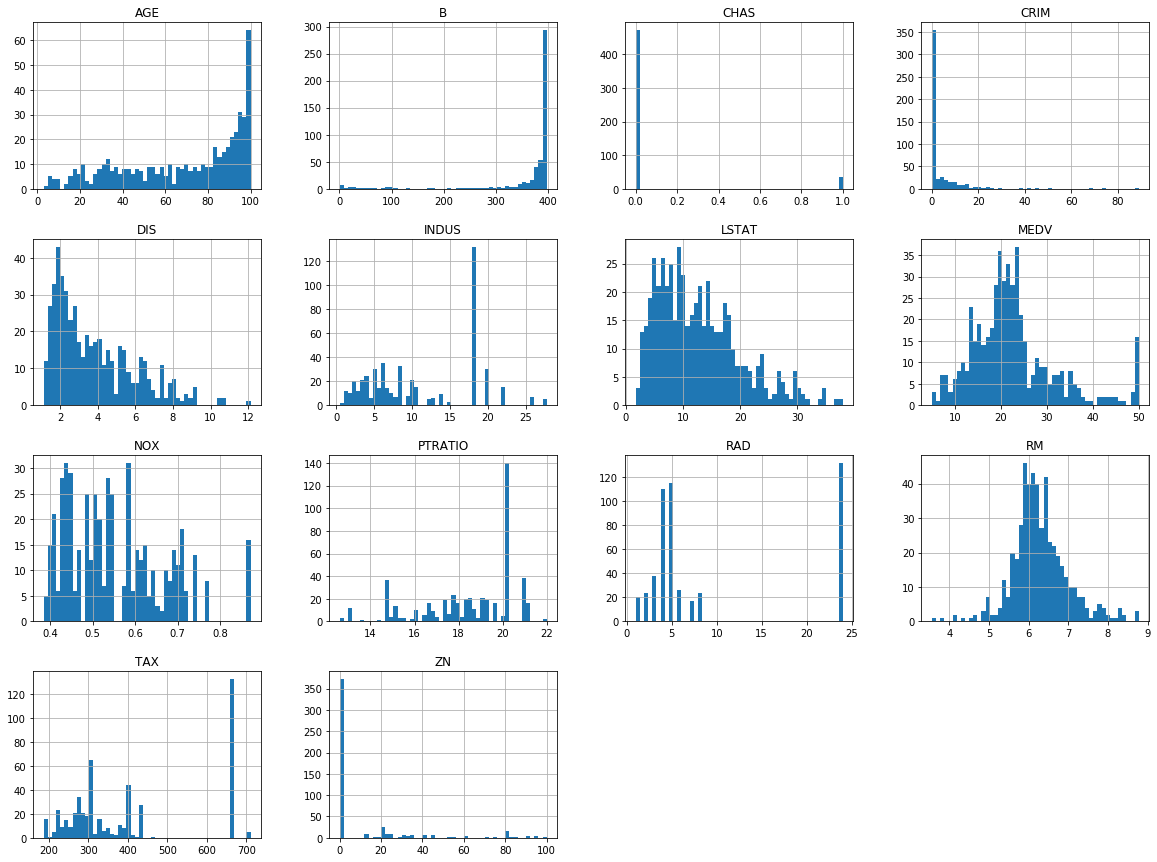

In [226]:
%matplotlib inline

import matplotlib.pyplot as plt
housing_tr.hist(bins=50, figsize=(20,15))
plt.show()

In [227]:
corr_housing = housing_tr.corr()
corr_housing['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695668
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [228]:
# RM         0.695668 is releated to MEDV value.

In [229]:
# split the data set 

# random sampling methods

#from sklearn.model_selection import train_test_split
#train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [230]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [231]:
# To avoid sampling bias use stratified sampling:
# Do stratified sampling using RM values.


# It is important to have a sufficient number of instances in your dataset for each stratum,
# or else the estimate of the stratum’s importance may be biased.
# This means that you should not have too many strata, 
# and each stratum should be large enough.

housing_tr["dwelling"] = np.ceil(housing_tr["RM"] / 1.5) # 1.5 (to limit the number)
housing_tr["dwelling"].where(housing_tr["dwelling"] < 6, 6.0, inplace=True) # merging all the categories greater than 6 into category 6.

In [232]:
np.ceil(housing_tr["RM"] / 1.5)

0      5.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
501    5.0
502    5.0
503    5.0
504    5.0
505    5.0
Name: RM, Length: 506, dtype: float64

In [233]:
housing_tr['dwelling'].value_counts() / len(housing_tr)

5.0    0.606719
4.0    0.330040
6.0    0.053360
3.0    0.009881
Name: dwelling, dtype: float64

In [234]:
#from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_tr, housing_tr['dwelling']):
    strat_train_set = housing_tr.loc[train_index]
    strat_test_set = housing_tr.loc[test_index]

In [235]:
# remove the income_cat attribute so the data is back to its original state:
for set in (strat_train_set, strat_test_set):
    set.drop(["dwelling"], axis=1, inplace=True)

In [236]:
# Prepare the Data for Machine Learning Algorithms

housing_tr = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set['MEDV'].copy()

In [237]:
# Training and Evaluating on the Training Set


In [239]:
# Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error function.

from sklearn.metrics import mean_squared_error


In [240]:
# try the RandomForestRegressor

# Random Forests work by training many Decision Trees on random subsets of
# the features, then averaging out their predictions. Building a model on top of many
#other models is called Ensemble Learning.

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_tr, housing_labels)

housing_predictions = forest_reg.predict(housing_tr)

forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [242]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [243]:
display_scores(forest_rmse)

Scores: 1.749354690073791
Mean: 1.749354690073791
Standard deviation: 0.0


In [261]:
# Implement cross validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, housing_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)

rmse_scores = np.sqrt(-scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [262]:
display_scores(rmse_scores)

Scores: [4.05949865 2.91475891 5.52983725 2.60124079 3.08906661 3.64307254
 5.39277062 3.27547058 4.85957663 3.32511579]
Mean: 3.869040835793021
Standard deviation: 0.9961428134903563


In [264]:
# save Scikit-Learn models by using Python’s pickle module, or using sklearn.externals.joblib

from sklearn.externals import joblib
joblib.dump(forest_reg, "my_model.pkl")

# my_model_loaded = joblib.load("my_model.pkl")

['my_model.pkl']

In [255]:
# Fine-Tune Your Model
# Grid Search

from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error')

grid_search.fit(housing_tr, housing_labels)

grid_search.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)